# Gradient Descent

In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv("E:\Data Science\datasets\insurance_data(with affordibility).csv")

In [3]:
df.head()

,age,affordibility,bought_insurance
0,22,1,0
1,25,0,0
2,47,1,1
3,52,0,0
4,46,1,1


In [4]:
df.shape

(28, 3)

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df[['age', 'affordibility']], df['bought_insurance'], test_size=0.1, random_state=43)

In [6]:
X_train_scaled = X_train.copy()
X_train_scaled['age'] = X_train_scaled['age']/100

X_test_scaled = X_test.copy()
X_test_scaled['age'] = X_test_scaled['age']/100

In [7]:
X_train_scaled, X_test_scaled

(     age  affordibility
 6   0.55              0
 7   0.60              0
 15  0.55              1
 18  0.19              0
 8   0.62              1
 27  0.46              1
 5   0.56              1
 24  0.50              1
 13  0.29              0
 23  0.45              1
 20  0.21              1
 1   0.25              0
 9   0.61              1
 11  0.28              1
 3   0.52              0
 26  0.23              1
 14  0.49              1
 2   0.47              1
 25  0.54              1
 19  0.18              1
 16  0.25              0
 21  0.26              0
 17  0.58              1
 0   0.22              1
 4   0.46              1,
      age  affordibility
 12  0.27              0
 22  0.40              1
 10  0.18              1)

In [8]:
import tensorflow as tf
import keras

In [9]:
model = keras.Sequential([
    keras.layers.Dense(1, input_shape=(2,), activation='sigmoid', kernel_initializer='ones', bias_initializer='zeros')
])

model.compile(
    optimizer="adam",
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [10]:
model.fit(X_train_scaled, y_train, epochs=1000)

Epoch 1/1000
1/1 [==============================] - 0s 353ms/step - loss: 0.7016 - accuracy: 0.5200
Epoch 2/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.7013 - accuracy: 0.5200
Epoch 3/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.7009 - accuracy: 0.5200
Epoch 4/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.7005 - accuracy: 0.5200
Epoch 5/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.7002 - accuracy: 0.5200
Epoch 6/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.6998 - accuracy: 0.5200
Epoch 7/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.6994 - accuracy: 0.5200
Epoch 8/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.6991 - accuracy: 0.5200
Epoch 9/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.6987 - accuracy: 0.5200
Epoch 10/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.6983 - accuracy: 0.5200
Epoch 11/1000
1/1

In [11]:
model.evaluate(X_test_scaled, y_test)

1/1 [==============================] - 0s 97ms/step - loss: 0.6089 - accuracy: 0.6667


[0.6089022755622864, 0.6666666865348816]

In [12]:
model.predict(X_test_scaled)

array([[0.41759297],
       [0.6312541 ],
       [0.56223553]], dtype=float32)

In [13]:
X_test_scaled

,age,affordibility
12,0.27,0
22,0.40,1
10,0.18,1


In [14]:
y_test

12    0
22    1
10    0
Name: bought_insurance, dtype: int64

<br><br>
## _So now we will get weights and see how the pred with sigmoid functon work.._ 😉

In [15]:
# y = mx + c

coef, intercept = model.get_weights()

In [16]:
coef, intercept

(array([[1.3061857],
        [0.700459 ]], dtype=float32),
 array([-0.68533254], dtype=float32))

In [17]:
import math 

def sigmoid(x):
    return 1/(1 + math.exp(-x))

In [18]:
def pred_func(age, aford):
    w1 = coef[0]
    w2 = coef[1]
    wsum = w1*age + w2*aford + intercept
    return sigmoid(wsum)

In [19]:
# so in we can see the peredicted val of our model when X_test = 0.27--- 0, get 0.15.. in y_pred which means the person will not buy the insurance
pred_func(0.27, 0)

0.4175929679654676

In [20]:
# log loss or binary cross entropy

def log_loss(y_true, y_pred):
    epln = 1e-15
    y_pred_n = [max(i, epln) for i in y_pred]
    y_pred_n = [min(i, 1-epln) for i in y_pred_n]
    y_pred_n = np.array(y_pred_n)
    return -np.mean(y_true*np.log(y_pred_n) + (1-y_true) * np.log(1-y_pred_n))

In [21]:
def sigmoid_numpy(x):
    return 1/(1 + np.exp(-x))

sigmoid_numpy(np.array([12, 0, 1]))

array([0.99999386, 0.5       , 0.73105858])

In [22]:
def grad_dcnt(age, aford, y_true, epochs, loss_thresh):
    w1 = w2 = 1
    bias = 0
    l_rate = 0.5
    n = len(age)
    for i in range(epochs):
        wsum = w1*age + w2*aford + bias
        y_pred = sigmoid_numpy(wsum)
        
        loss = log_loss(y_true, y_pred)
        
        w1_d = (1/n)*np.dot(np.transpose(age), (y_pred-y_true))
        w2_d = (1/n)*np.dot(np.transpose(aford), (y_pred-y_true))
        
        bias_d = np.mean(y_pred-y_true)
        
        w1 = w1-l_rate * w1_d
        w2 = w2-l_rate * w2_d
        
        bias = bias - l_rate*bias_d
        
        print(f"Epoch: {i}, w1: {w1}, w2: {w2}, bias: {bias}, loss: {loss}")
        
        if loss<=loss_thresh:
            break
        
    return w1, w2, bias

In [38]:
# grad_dcnt(X_train_scaled['age'], X_train_scaled['affordibility'], y_train, 1000, 0.38)

<br>


##  Making your own model

In [50]:
x_axis = []
y_axis = []
z_axis = []

class myNNModel:
    
    
    def __init__(self):
        self.w1 = 1
        self.w2 = 1
        self.bias = 0
        
    
    def fit(self, X, y, epochs, loss_thresh):
        self.w1, self.w2, self.bias = self.grad_dcnt(X['age'], X['affordibility'], y, epochs, loss_thresh)
        print(f"\nFinal weights and bias: w1: {self.w1}, w2: {self.w2}, bias: {self.bias}")
    
    def predict(self, X_test):
        weightedSum = self.w1 * X_test['age'] + self.w2 * X_test['affordibility'] + self.bias
        return sigmoid_numpy(weightedSum)
    
    def grad_dcnt(self, age, aford, y_true, epochs, loss_thresh):
        w1 = w2 = 1
        bias = 0
        l_rate = 0.5
        n = len(age)
        for i in range(epochs):
            wsum = w1*age + w2*aford + bias
            y_pred = sigmoid_numpy(wsum)

            loss = log_loss(y_true, y_pred)

            w1_d = (1/n)*np.dot(np.transpose(age), (y_pred-y_true))
            w2_d = (1/n)*np.dot(np.transpose(aford), (y_pred-y_true))

            bias_d = np.mean(y_pred-y_true)

            w1 = w1-l_rate * w1_d
            w2 = w2-l_rate * w2_d

            bias = bias - l_rate*bias_d

            if i%50==0:
                print(f"Epoch: {i}, w1: {w1}, w2: {w2}, bias: {bias}, loss: {loss}")
                x_axis.append(w1), y_axis.append(w2), z_axis.append(loss) 
                
            if loss<=loss_thresh:
                break
        
        return w1, w2, bias

In [51]:
cusModel = myNNModel()
cusModel.fit(X_train_scaled, y_train, 1000, 0.2)

Epoch: 0, w1: 0.977672737369324, w2: 0.9456900916891551, bias: -0.10861556247482547, loss: 0.7016465235165659
Epoch: 50, w1: 1.58879658799231, w2: 1.0596209191472943, bias: -1.2064809656810707, loss: 0.5625047735172277
Epoch: 100, w1: 2.344374954931209, w2: 1.2348504723726796, bias: -1.663457643250195, loss: 0.5297715047677536
Epoch: 150, w1: 3.0443267290170217, w2: 1.3087806106751756, bias: -2.0167638133208605, loss: 0.5048323234697273
Epoch: 200, w1: 3.6842830009831364, w2: 1.3428022882594786, bias: -2.312695306282083, loss: 0.48481831350960414
Epoch: 250, w1: 4.26666275301595, w2: 1.3615791423500079, bias: -2.572012910718861, loss: 0.4684857032026512
Epoch: 300, w1: 4.796325939031567, w2: 1.375152951155388, bias: -2.804936815947549, loss: 0.4550379436755981
Epoch: 350, w1: 5.278717894711145, w2: 1.387503568547802, bias: -3.0170517542528947, loss: 0.4438855544191385
Epoch: 400, w1: 5.719090626856137, w2: 1.4000724179538402, bias: -3.211785278325352, loss: 0.4345744799146136
Epoch: 45

In [52]:
cusModel.predict(X_test_scaled)

12    0.091427
22    0.607897
10    0.176821
dtype: float64

In [53]:
model.predict(X_test_scaled)

array([[0.41759297],
       [0.6312541 ],
       [0.56223553]], dtype=float32)

In [54]:
# x_axis, y_axis, z_axis

In [55]:
import matplotlib.pyplot as plt
import mpl_toolkits
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import pyplot

In [56]:
x_axis, y_axis, z_axis = np.array(x_axis), np.array(y_axis), np.array(z_axis)
X, Y = np.meshgrid(x_axis, y_axis)

Z, _ = np.meshgrid(z_axis, z_axis)

In [57]:
# plt.style.use(['dark_background'])

# fig = plt.figure(figsize=(10,10))
# ax = plt.axes(projection='3d')

# ax.set_title("Loss Function")
# ax.set_xlabel("w1")
# ax.set_ylabel("w2")
# ax.set_zlabel("Loss")
# ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap='PuRd', edgecolor = 'none');

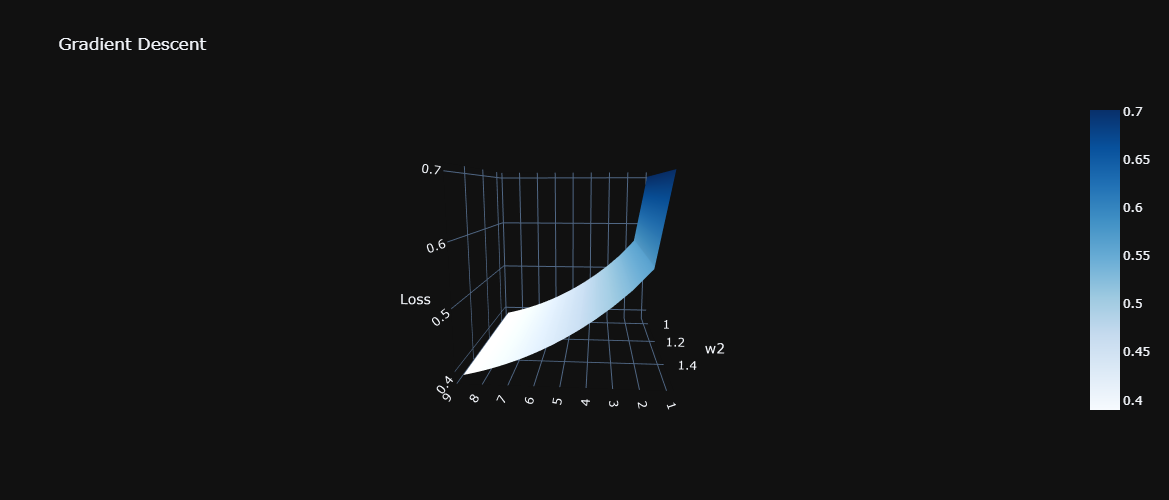

In [58]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

import numpy as np

# Initialize figure with 4 3D subplots
# fig = make_subplots(
#     rows=2, cols=2,
#     specs=[[{'type': 'surface'}, {'type': 'surface'}],
#            [{'type': 'surface'}, {'type': 'surface'}]])

# adding surfaces to subplots.
# fig.add_trace(
#     go.Surface(x=X, y=Y, z=Z, colorscale='Viridis', showscale=True))

fig = go.Figure(data=[go.Surface(x=X, y=Y, z=Z, colorscale ='Blues')])

fig.update_layout(
    title_text='Gradient Descent', autosize=False, scene = dict(
                    xaxis_title='w1',
                    yaxis_title='w2',
                    zaxis_title='Loss'),
                    height=500, width=500, template="plotly_dark"
)

fig.show()